Data loaded
Data loaded


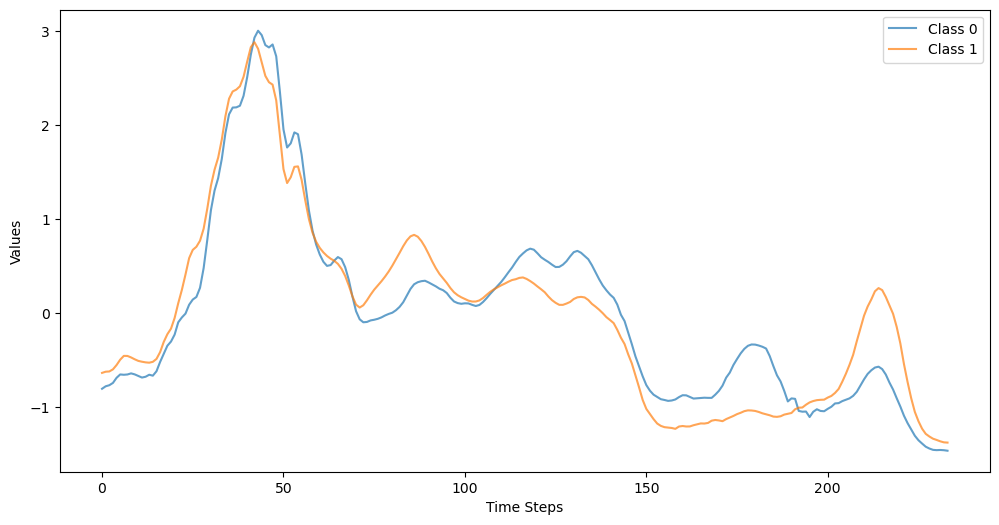

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

def read_ucr(filename):
    data = []
    labels = []
    label_set = set()  

    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) < 2:
                continue
            label = int(parts[-1].split(':')[-1])
            label_set.add(label)

 
    if label_set == {0, 1}: 
        def normalize(label):
            return label
    elif label_set == {1, 2}:  
        def normalize(label):
            return 0 if label == 1 else 1
    elif label_set == {-1, 1}:  
        def normalize(label):
            return 0 if label == -1 else 1
    else:
        raise ValueError(f"Unexpected label set: {label_set}")

    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) < 2:
                continue
            features = [float(f) for f in parts[:-1]]
            label = int(parts[-1].split(':')[-1])
            normalized_label = normalize(label)
            labels.append(normalized_label)
            data.append(features)

    print("Data loaded")
    return np.array(data), np.array(labels)
    
def normalize_data(x_train, x_test):
    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean) / x_train_std
    x_test = (x_test - x_train_mean) / x_train_std
    return x_train, x_test

def plot_classes_together(data, labels, num_instances=1):
    unique_classes = np.unique(labels)
    plt.figure(figsize=(12, 6))

    for cls in unique_classes:
        cls_indices = np.where(labels == cls)[0]
        random_indices = random.sample(list(cls_indices), min(num_instances, len(cls_indices)))
        
        for idx in random_indices:
            plt.plot(data[idx], label=f'Class {cls}', alpha=0.7)

    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
# train_file = 'data/Yoga/Yoga_TRAIN.ts'
# test_file = 'data/Yoga/Yoga_TEST.ts'

# train_file = 'data/SharePriceIncrease/SharePriceIncrease_TRAIN.ts'
# test_file = 'data/SharePriceIncrease/SharePriceIncrease_TEST.ts'

# train_file = 'data/FordB/FordB_TRAIN.ts'
# test_file = 'data/FordB/FordB_TEST.ts'

train_file = 'data/Strawberry/Strawberry_TRAIN.ts'
test_file = 'data/Strawberry/Strawberry_TEST.ts'

x_train, y_train = read_ucr(train_file)
x_test, y_test = read_ucr(test_file)
x_train, x_test = normalize_data(x_train, x_test)

plot_classes_together(x_train, y_train, num_instances=1)

In [46]:
train_class_counts = np.bincount(y_train)
print("Training dataset class distribution:")
for class_idx, count in enumerate(train_class_counts):
    print(f"Class {class_idx}: {count}")

# Print the class distribution of the testing dataset
test_class_counts = np.bincount(y_test)
print("\nTesting dataset class distribution:")
for class_idx, count in enumerate(test_class_counts):
    print(f"Class {class_idx}: {count}")

Training dataset class distribution:
Class 0: 137
Class 1: 163

Testing dataset class distribution:
Class 0: 1392
Class 1: 1607
